# Spotify listening history
Spotify recently sent me their '2016 Wrapped' email containing a few statistics about my listening habits in 2016, and a playlist of my 101 most played songs. 

I decided to compare their statistics with those I'd gathered myself. There is an option in the Preferences menu to log ('scrobble') your Spotify listening history to last.fm. from where you can then download your data. I thought it would be interesting to verify my Spotify stats, and see if I could discover any other interesting insights.

## 1. Notebook set-up

In [1]:
# Display plot results inline, not in a separate window
%matplotlib inline
%pylab inline

# Set the size of all figures
pylab.rcParams['figure.figsize'] = (14, 5)

# Import pandas and a nicer plotting style
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use = 'default'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Make the dataframes look a bit prettier
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Print output to 2 decimal places only
#pd.options.display.float_format = '{:,.2f}'.format # Just works for this cell only

# This sets behaviour for entire notebook
%precision %.2f  

'%.2f'

## 2. Load and explore the data

In [3]:
# Load in the data from the .csv file I downloaded
column_names = ['Artist', 'Album', 'Name', 'd_t']

# Choose the column names
df = pd.read_csv('listening_history.csv', index_col=None, names = column_names, encoding='utf-8', header=None) 

# Convert the date time column (d_t) from a string to date time, so that I can search by date 
df['d_t'] = pd.to_datetime(df['d_t'])

Some initial questions to answer to get a feel for the data: 
- How much data is there?
- What type of data is present? 
- What are the maximum and minimum values? 
- ...etc. 

In [4]:
# View the top 10 rows
df.head(10)

,Artist,Album,Name,d_t
0,Bonobo,Animal Magic,Kota,NaT
1,Samaris,Samaris,Góða tungl,2016-12-15 09:44:00
2,The Staves,Dead & Born & Grown,Mexico,2016-12-15 09:40:00
3,Bonobo,Animal Magic,Kota,2016-12-15 09:34:00
4,The Gloaming,The Gloaming,The Sailor's Bonnet,2016-12-15 09:30:00
5,St. Germain,St Germain,Forget Me Not,2016-12-15 09:24:00
6,Yosi Horikawa,Wandering,Bubbles,2016-12-15 09:19:00
7,South,Music from The O.C. Mix 1,Paint the Silence,2016-12-15 09:13:00
8,The Staves,Sleeping In A Car,Sleeping In A Car,2016-12-15 09:09:00
9,Bonobo,Days to Come,Recurring,2016-12-15 09:04:00


In [5]:
#How many rows are there?
len(df)

36454

In [6]:
# How many 2016 rows
len(df[df.d_t.dt.year == 2016])

1983

In [7]:
# Are there any NaN values in 2016?
Ans = len(df[(df.d_t.dt.year == 2016) & (df.isnull().any(axis=1))])
print('There are', Ans, 'rows with NaN values in 2016')

There are 0 rows with NaN values in 2016


In [8]:
# Maximum and minimum dates
print("Oldest record is:",df.d_t.min())
print("Most recent record is:",df.d_t.max())

Oldest record is: 1970-01-01 00:00:00
Most recent record is: 2016-12-15 09:44:00


Scrobbling to last.fm was turned off for the first half of 2016. 

In [9]:
#print("Oldest record in 2016 is:",df[df.d_t.dt.year == 2016].d_t.min())
print('Scrobbling in 2016 began at:',df[df.d_t.dt.year == 2016].d_t.min())

Scrobbling in 2016 began at: 2016-06-14 20:24:00


Therefore it will be important to remember that the data being analysed only represents about half of 2016.

## 3. Verify Spotify's statistics
### 3a. Total Minutes

According to Spotify, I listened to 2357 unique artists this year, and 3309 unique tracks. Total streaming time was 45202 minutes. They dont tell me how many non-unique plays I accumulated.

Googling 'average song length' reveals that most pop songs last 3.5 minutes, but I think the songs I listen to are longer than that. 

Spotify's UI is understandably light on details, so initially I wondered how to calculate my average song length. First I just eyeballed the data ('scanning analytics..'). Then I realised I could sort the playlist by song length and then I could pick the Median, although I'd need to know how mang songs were in the playlist.

Whilst searching for playlist properties like 'number of songs' I simply spotted  what I needed below the description; 101 songs, total play time of 8hrs, 29 minutes. 

Spotify tell me I've spent 45202 minuts streaming music and listened to 3309 unique tracks in 2016.

Therefore:

In [10]:
# Average length of my 101 most listened to songs
Average = round((8*60 + 29)*60/101,2)
print("Average song length:", Average, "seconds")
print("or 5 minutes, 2 seconds \n")

# Time spent listening to Spotify in days
print("Days listening to Spotify in 2016:", round(45303/60/24,2))
print("...Really? A whole month?!? \n")

# Time spent listening to Spotify in seconds
seconds_used = 45202 * 60 

# Number of songs played 
n_tracks = round(seconds_used / Average,2)
print("Number of songs played in 2016:",n_tracks)

# Average number of plays per songs
unique_tracks = 3309 # From summary email
average_plays = round(n_tracks / unique_tracks,2)
print("On average, I listen to each track", average_plays, "times")

Average song length: 302.38 seconds
or 5 minutes, 2 seconds 

Days listening to Spotify in 2016: 31.46
...Really? A whole month?!? 

Number of songs played in 2016: 8969.24
On average, I listen to each track 2.71 times


This is really a surprisingly large amount of time spent listening. I cannot believe I spent 1/12 of 2016 streaming music from Spotify. I also thought I was quite a repetitive listener, so the average of 2.7 plays per song is surprisingly low. (For example, I have a short playlist with 'Recurring' by Bonobo in it 5 times.)

### 3b. Unique artists
According to Spotify, I listened to 2357 unique artists in 2016.

In [11]:
Ans = len(df.Artist[df.d_t.dt.year == 2016].value_counts())
print('Number of unique artists scrobbled in 2016:', Ans)

Number of unique artists scrobbled in 2016: 510


If all songs were being scrobbled to last.fm and my listening behaviour remained the same thoughout the year, I would have expected the result to be about half of Spotify's result (because I only began scrobbling in June). The summary email reported 2357 unique artists in 2016. 510 is clearly much less than half of 2357.

### 3c. Unique tracks

In [12]:
Ans = len(df.Name[df.d_t.dt.year == 2016].value_counts())
print('Number of unique tracks scrobbled in 2016:',Ans)

Number of unique tracks scrobbled in 2016: 1060


Spotify reported 3309 unique tracks played in 2016. My result of 1060 unique tracks in only the second half of 2016 is less than I would have expected, though the difference between expectation and result is not as great as for unique artists.

### 3d. My top tracks
According to Spotify, my 3 most played tracks in 2016 are:
1. Lights Out Words Gone 
2. Shuffle
3. Luna
  
...all by Bombay Bicyle Club

In [13]:
# Which tracks did I listen to the most in 2016?
df.Name[df.d_t.dt.year == 2016].value_counts().head(10)

Miserere                 14
Shuffle                  14
Lights Out Words Gone    12
The Pilgrim’s Song       12
Always Like This         12
Luna                     11
The Hare                 11
You Already Know         11
Koop Island Blues        10
The Sailor's Bonnet      10
Name: Name, dtype: int64

This shows that whilst the 'top tracks' are some of my most listened to tracks, Spotify either uses a different method to calculate plays, or 'top' is not synonymous to 'most frequent'. 

When using data from June onwards, my 'top tracks' are only my joint 1st, 3rd and 6th most frequent plays.

### 3e. Top Artists
Results from Spotify:
1. Bonobo 
2. Bombay Bicyle Club
3. The Staves
4. Thievery Corporation
5. Jack Johnson

In [14]:
df.Artist[df.d_t.dt.year == 2016].value_counts().head(10)

The Staves                          170
Bonobo                              161
The Gloaming                        132
Koop                                107
Bombay Bicycle Club                 105
Giovanni Pierluigi da Palestrina     70
Jimi Hendrix                         48
Jack Johnson                         44
Gregorio Allegri                     43
Broken Social Scene                  33
Name: Artist, dtype: int64

My results are different to Spotify's, but not by much. 


 Artist              | Spotify's results| My result 
 ------------------- |:----------------:| ---------:
 Bonobo    | 1 | 2
 Bombay Bicycle Club | 2 | 5
 The Staves | 3 | 1
 Thievery Corporation | 4 | -
 Jack Johnson | 5 | 8

Apart from Thievery Corporation being conspicuously absent from my own scrobbled data, all other differences could reasonably be explained by listening trends being different from Jan - June than July - Dec.

The results show that I prefer listening to Bonobo over Bombay Bicycle Club, but that my 3 most played songs are all by Bombay Bicyle Club. This shows that there are more songs by Bonobo that I enjoy listening to, and that I have more polarised opinions about songs by Bombay Bicyle Club. 

### 3f. Favourite day to listen
According to Spotify, I stream more music on Saturday than any other day.


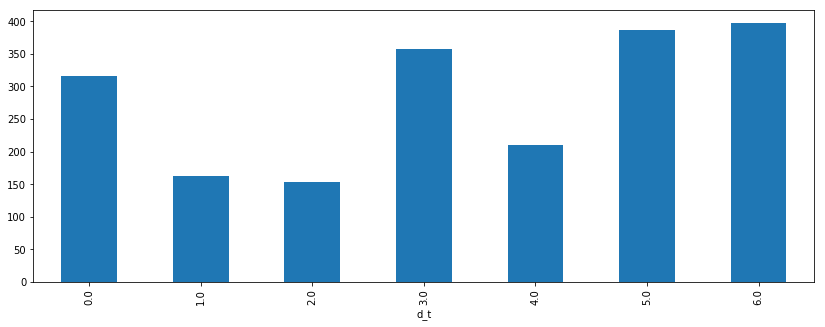

In [15]:
# Plot how many songs wer played on each day of the week in the second half of 2016
df[df.d_t.dt.year == 2016].Name.groupby(df.d_t.dt.dayofweek).count().plot(kind="bar")

Monday=0 and Sunday=6. 

This result shows that I stream more music on a Sunday than any other day. This is a different result to Spotify's report. 

The small difference could be explained (again) by my data set only relating to the second half of 2016. From January to June I listened to more music on a Saturday than a Sunday - probably when I was playing Starcraft. This hobby unfortunately was put on ice and had to come second to revision for exams in July and November. 

### 4. Time of day
I thought it would be interesting to also see how much music I listen to at different times. I expect my listening habits to be different during the week compared to weekends, so I split the data by day and then summed the songs played whilst grouping them by hour.

The figures below show an unexpected dip around 3pm at weekends, and consistent streaming through the day whilst at the office during the week. No matter which day of the week, it appears I always listen to music in the evenings. 

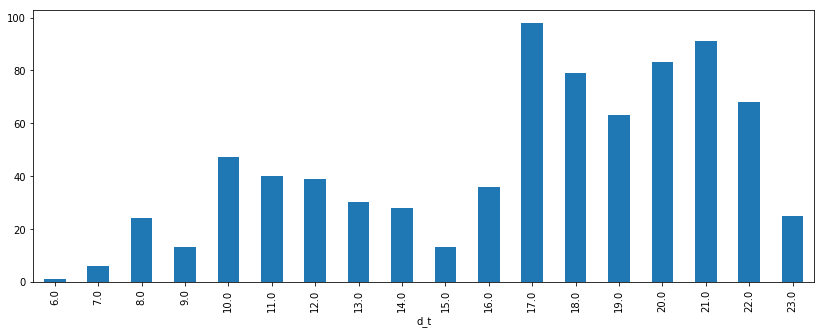

In [16]:
# Count number of songs played during each hour at the weekends 
df[(df.d_t.dt.year == 2016) & (df.d_t.dt.dayofweek > 4)].Name.groupby(df.d_t.dt.hour).count().plot(kind="bar")

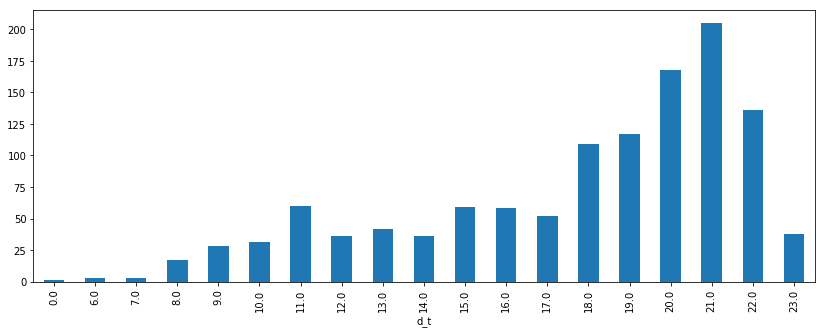

In [17]:
# Count number of songs played during each hour during the week
df[(df.d_t.dt.year == 2016) & (df.d_t.dt.dayofweek < 5)].Name.groupby(df.d_t.dt.hour).count().plot(kind="bar")

### 5. Conclusions
Most of the attempts to verify Spotfiy's statistics fall short because my data only covers the second half of 2016. This shows the requirement of good quality inputs in order to achieve good quality results.

Having said that, it is clear that I listen to Spotify far more than I thought I did. The observation that I like many of Bonobo's tracks but have more polarised views about Bombay Bicycle Club's songs is novel. Most of all, I think I'm getting great value!

The chart below is number of songs played each day from 14 June 2016 to 15 December 2016. 

My top 101 songs of 2016 can be played at:
https://open.spotify.com/user/spotify/playlist/37i9dQZF1CyJD4o58dMxry

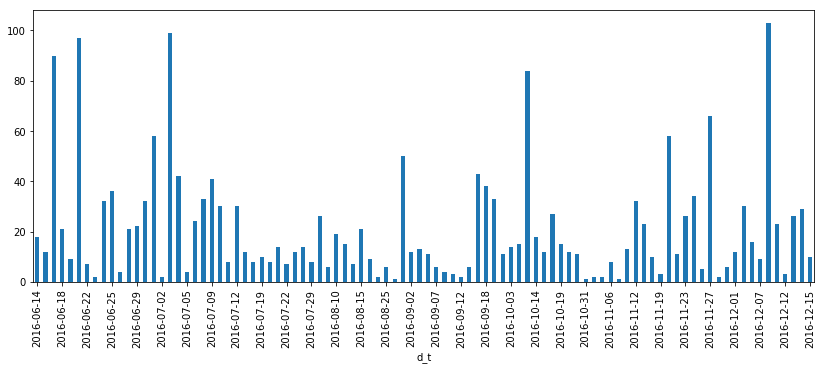

In [18]:
import warnings
warnings.filterwarnings('ignore')

figure = df[df.d_t.dt.year == 2016].Name.groupby(df.d_t.dt.date).count().plot(kind="bar")
foo = figure.xaxis.get_ticklocs()

n = 3

ticks = figure.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in figure.xaxis.get_ticklabels()]
figure.xaxis.set_ticks(ticks[::n])
figure.xaxis.set_ticklabels(ticklabels[::n])

figure.figure.show()